In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


df= pd.read_csv(r'data\breast-cancer.csv')
# Explore shape
print("Shape:", df.shape)

# First 5 rows
print(df.head())

# Basic info
print(df.info())

# Check class distribution
print("Class distribution:\n", df['diagnosis'].value_counts())

# Summary statistics
print(df.describe())





Shape: (569, 32)
Class distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

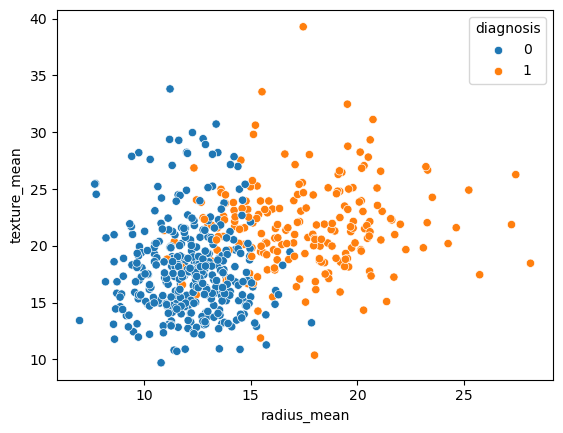

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

# Show correlation of all features with target
print(corr['diagnosis'].sort_values(ascending=False))

sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv(r'data\breast-cancer.csv')

# Convert target (M/B) → numeric
le = LabelEncoder()
y = le.fit_transform(df['diagnosis'])   # M/B → 0/1

# Pick 2 features
X = df[['radius_mean', 'texture_mean']]

# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Standardize features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 3. Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_s, y_train)
log_acc = accuracy_score(y_test, log_clf.predict(X_test_s))

# 4. SVM (linear kernel)
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_s, y_train)
svm_acc = accuracy_score(y_test, svm_clf.predict(X_test_s))

print(f"Logistic Regression accuracy: {log_acc:.3f}")
print(f"SVM (linear) accuracy:       {svm_acc:.3f}")


Logistic Regression accuracy: 0.868
SVM (linear) accuracy:       0.868
